In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df_train=pd.read_csv("/kaggle/input/titanic/train.csv")
df_test=pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
print(df_train.shape)
print(df_train.describe())
print(df_train.head())

(891, 12)
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
   PassengerId  Survived  Pclass  \
0            1         0       3   

In [4]:
print(df_test.shape)
print(df_test.describe())
print(df_test.head())

(418, 11)
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                 

In [5]:
print(df_train.isnull().sum())
print('--------------------------')
print(df_test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [6]:
print("Value counts of some variables train set")
print(df_train['Embarked'].value_counts())
print('---------------------------------------')
print(df_train['Sex'].value_counts())
print('---------------------------------------')
print(df_train['Age'].value_counts())
print('---------------------------------------')
print(df_train['Pclass'].value_counts())
print('---------------------------------------')
print(df_train['SibSp'].value_counts())
print('---------------------------------------')
print(df_train['Parch'].value_counts())
print('---------------------------------------')
print(df_train['Cabin'].value_counts())
print('---------------------------------------')
print('---------------------------------------')
print("Value counts of some variables test set")
print(df_test['Embarked'].value_counts())
print('---------------------------------------')
print(df_test['Sex'].value_counts())
print('---------------------------------------')
print(df_train['Age'].value_counts())
print('---------------------------------------')
print(df_test['Pclass'].value_counts())
print('---------------------------------------')
print(df_test['SibSp'].value_counts())
print('---------------------------------------')
print(df_test['Parch'].value_counts())
print('---------------------------------------')
print(df_test['Cabin'].value_counts())
print('---------------------------------------')


Value counts of some variables train set
S    644
C    168
Q     77
Name: Embarked, dtype: int64
---------------------------------------
male      577
female    314
Name: Sex, dtype: int64
---------------------------------------
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64
---------------------------------------
3    491
1    216
2    184
Name: Pclass, dtype: int64
---------------------------------------
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
---------------------------------------
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
---------------------------------------
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147

In [7]:
#Replacing null values in the age column with the mean age 
df_train['Age']=df_train['Age'].fillna(30)
# df_train['Age'].isnull().sum()
df_test['Age']=df_test['Age'].fillna(30)
# df_test['Age'].isnull().sum()

In [8]:
#Replacing null values in the other columns
df_train['Embarked']=df_train['Embarked'].fillna('S')  
df_test['Fare']=df_test['Fare'].fillna(35.6)  
print('XXXXXXXXXXXXX    ALL NULL VALUES HAVE BEEN TAKEN CARE OF    XXXXXXXXXXXXX')

XXXXXXXXXXXXX    ALL NULL VALUES HAVE BEEN TAKEN CARE OF    XXXXXXXXXXXXX


**ENCODING THE CATEGORICAL VARIABLES**

In [9]:
#firstly the training set
print(df_train['Sex'].value_counts())
dummy = pd.get_dummies(df_train['Sex'])
print(dummy.head())

male      577
female    314
Name: Sex, dtype: int64
   female  male
0       0     1
1       1     0
2       1     0
3       1     0
4       0     1


In [10]:
df_train1 = pd.concat((df_train,dummy),axis=1)
df_train1=df_train1.drop(['Sex','male'],axis=1)
df_train1=df_train1.rename(columns={'female':'Sex'})
df_train1.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0


In [11]:
print(df_train1['Embarked'].value_counts())
dummy_embarked=pd.get_dummies(df_train1['Embarked'])
print(dummy_embarked.head())

S    646
C    168
Q     77
Name: Embarked, dtype: int64
   C  Q  S
0  0  0  1
1  1  0  0
2  0  0  1
3  0  0  1
4  0  0  1


In [12]:
df_train1 = pd.concat((df_train1,dummy_embarked),axis=1)
df_train1=df_train1.drop(['Embarked','Q'],axis=1)
df_train1=df_train1.rename(columns={'C':'Embarked_C','S':'Embarked_S'})
df_train1.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex,Embarked_C,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1


In [13]:
#Now the test set 
dummy1 = pd.get_dummies(df_test['Sex'])
print(dummy1.head())

   female  male
0       0     1
1       1     0
2       0     1
3       0     1
4       1     0


In [14]:
df_test1 = pd.concat((df_test,dummy1),axis=1)
df_test1=df_test1.drop(['Sex','male'],axis=1)
df_test1=df_test1.rename(columns={'female':'Sex'})
df_test1.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,1


In [15]:
print(df_test1['Embarked'].value_counts())
dummy_embarked_test=pd.get_dummies(df_test1['Embarked'])
print(dummy_embarked_test.head())

S    270
C    102
Q     46
Name: Embarked, dtype: int64
   C  Q  S
0  0  1  0
1  0  0  1
2  0  1  0
3  0  0  1
4  0  0  1


In [16]:
df_test1 = pd.concat((df_test1,dummy_embarked_test),axis=1)
df_test1=df_test1.drop(['Embarked','Q'],axis=1)
df_test1=df_test1.rename(columns={'C':'Embarked_C','S':'Embarked_S'})
df_test1.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex,Embarked_C,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,1,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,0,0,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,1,0,1


In [17]:
# print(df_train.columns)
y=df_train1.iloc[:,1].values
X=df_train1.loc[:,['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked_C', 'Embarked_S']].values
print(y[0:5])
print(X[0:5])



[0 1 1 1 0]
[[ 3.      0.     22.      1.      0.      7.25    0.      1.    ]
 [ 1.      1.     38.      1.      0.     71.2833  1.      0.    ]
 [ 3.      1.     26.      0.      0.      7.925   0.      1.    ]
 [ 1.      1.     35.      1.      0.     53.1     0.      1.    ]
 [ 3.      0.     35.      0.      0.      8.05    0.      1.    ]]


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print(len(X_train))
print(len(y_train))

668
668


# Logical Regression Classifier 

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[ 0.83012938 -0.72705166 -0.14821366 ... -0.48380773 -0.45841567
   0.59809997]
 [ 0.83012938  1.37541808 -0.99739413 ... -0.48323058 -0.45841567
   0.59809997]
 [ 0.83012938 -0.72705166  0.00618279 ... -0.32165051 -0.45841567
   0.59809997]
 ...
 [ 0.83012938 -0.72705166  0.00618279 ... -0.48701956 -0.45841567
  -1.67196129]
 [ 0.83012938  1.37541808  0.46937214 ... -0.29595582 -0.45841567
   0.59809997]
 [-0.36497068 -0.72705166  2.32212954 ...  0.13097136 -0.45841567
   0.59809997]]
[[ 0.83012938 -0.72705166  0.00618279 ... -0.35409895  2.1814263
  -1.67196129]
 [ 0.83012938 -0.72705166  0.00618279 ... -0.49064251 -0.45841567
   0.59809997]
 [ 0.83012938 -0.72705166 -1.76937638 ... -0.06420947 -0.45841567
  -1.67196129]
 ...
 [ 0.83012938 -0.72705166 -0.84299768 ... -0.48619536 -0.45841567
   0.59809997]
 [-1.56007074  1.37541808 -0.68860123 ...  4.54601107  2.1814263
  -1.67196129]
 [ 0.83012938  1.37541808 -2.00097105 ... -0.30979142 -0.45841567
   0.59809997]]


In [20]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression(random_state = 0)
LR_classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = LR_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[116  23]
 [ 23  61]]


0.7937219730941704

**Visualization of Train and Test Set**

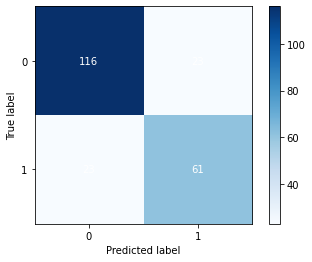

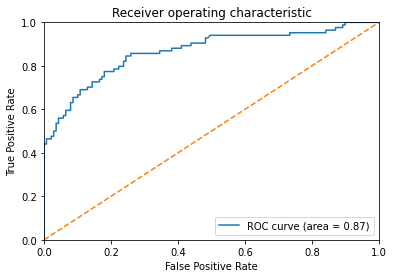

In [22]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, LR_classifier.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.xlabel("Predicted label")
plt.ylabel("True label")
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="white")
plt.show()

# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC curve (area = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Naive Bayes 